## Сулейманов Руслан группа к3141
Отчет по заданию из степика 3.1.2

In [241]:
%matplotlib inline
from skimage.io import imread, imsave, imshow
from skimage import img_as_float,img_as_ubyte
from numpy import array_equal,histogram, clip


Находим количество отбрасываемых пикселей:

In [254]:
img = imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
pix = img.size
print(pix)
k = round(pix*0.05)
print(k)

480000
24000


найдем макс и минимальное значение, использовав гистограмму:

In [251]:
h,_ = histogram(img,bins=range(257))
count = 0
const = 0
x_min=0
x_max=0
flag = True
flag2= True
for i in range(256):
    if flag:
        count +=h[i]
        if count > k:
            x_min = i
            flag = False
    if flag2:
        const +=h[255-i]
        if const > k:
            x_max = 255-i
            flag2 = False
    if flag == False and flag2 == False:   
        break
print(x_min, x_max)

129 208


преобразууем изображение, переведя во флоат, дабы избежать переполнения

[[ 48  38  38 ...   0   0   0]
 [ 41  45  48 ...   0   0   0]
 [ 41  41  35 ...   0   0   0]
 ...
 [138 119 125 ... 158 148 132]
 [119 122 122 ... 135 138 148]
 [119 125 122 ... 145 148 145]]


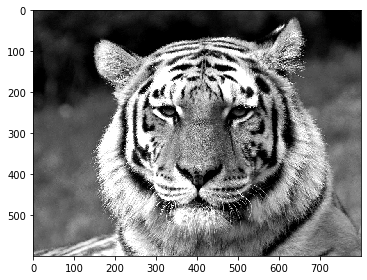

In [255]:
img = img.astype('float')
img = clip((img - x_min)*(255/(x_max-x_min)),0,255)
img = img.astype('uint8')
imshow(img)
print(img)

[[ 48  38  38 ...   0   0   0]
 [ 41  45  48 ...   0   0   0]
 [ 41  41  35 ...   0   0   0]
 ...
 [138 119 125 ... 158 148 132]
 [119 122 122 ... 135 138 148]
 [119 125 122 ... 145 148 145]]


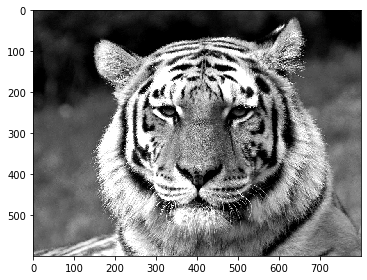

In [244]:
omg = imread('https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png')
imshow(omg)
print(omg)

In [256]:
array_equal(img, omg)

True